In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [4]:
dataset=dataset.drop("User ID",axis=1)
dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [5]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [7]:
independent=dataset[['Age', 'EstimatedSalary','Gender_Male']]
independent

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [8]:
dependent=dataset[['Purchased']]

In [9]:
dependent

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)  

In [11]:
X_train,X_test,Y_train,Y_test

(     Age  EstimatedSalary  Gender_Male
 218   46            96000            0
 101   28            59000            1
 311   39            96000            1
 194   28            89000            1
 326   41            72000            1
 ..   ...              ...          ...
 323   48            30000            0
 192   29            43000            1
 117   36            52000            1
 47    27            54000            0
 172   26           118000            0
 
 [266 rows x 3 columns],      Age  EstimatedSalary  Gender_Male
 132   30            87000            1
 309   38            50000            0
 341   35            75000            1
 196   30            79000            0
 246   35            50000            0
 ..   ...              ...          ...
 168   29           148000            1
 150   26            15000            0
 393   60            42000            1
 66    24            19000            1
 240   42           149000            1
 
 [134 rows x

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",splitter="random",max_features="log2",random_state = 0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='random')

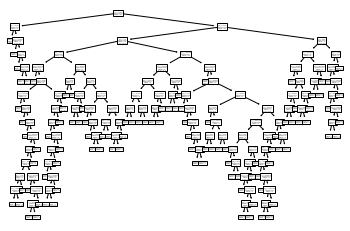

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(classifier)
plt.show()

In [15]:
y_pred=classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix  
cm=confusion_matrix (Y_test,y_pred)
cm

array([[77,  8],
       [ 6, 43]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
clf_report=classification_report(Y_test,y_pred)

In [18]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        85
           1       0.84      0.88      0.86        49

    accuracy                           0.90       134
   macro avg       0.89      0.89      0.89       134
weighted avg       0.90      0.90      0.90       134



In [19]:
classifier.predict([[40,300,1]])

array([0], dtype=int64)